In [164]:
import cv2
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

# load the image by taking the 'ascent' image from scipy
ascent = misc.ascent()

In [165]:
# ascent shape
ascent.shape

(512, 512)

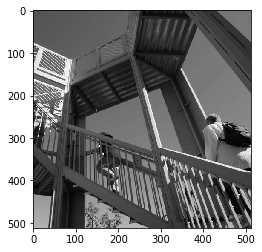

In [166]:
# plot image
plt.gray()
plt.imshow(ascent)
plt.show()

In [167]:
ascent_transformed = np.copy(ascent)
size_x = ascent_transformed.shape[0]
size_y = ascent_transformed.shape[1]

In [168]:
# filter - sharp edges and straight lines
filter1 = [[0, 1, 0], [1, -4, 1], [0, 1, 0]]
# filter - vertical lines
filter2 = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
# filter - horizontal lines
filter3 = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

weight = 1

In [169]:
def conv_img(filter, size_x=size_x, size_y=size_y, ascent=ascent):
    for x in range(1, size_x-1):
        for y in range(1, size_y-1):
            convolution = 0.0
            convolution = convolution + (ascent[x-1, y-1]*filter[0][0])
            convolution = convolution + (ascent[x, y-1]*filter[0][1])
            convolution = convolution + (ascent[x+1, y-1]*filter[0][2])
            convolution = convolution + (ascent[x-1, y]*filter[1][0])
            convolution = convolution + (ascent[x, y]*filter[1][1])
            convolution = convolution + (ascent[x+1, y]*filter[1][2])
            convolution = convolution + (ascent[x-1, y+1]*filter[2][0])
            convolution = convolution + (ascent[x, y+1]*filter[2][1])
            convolution = convolution + (ascent[x+1, y+1]*filter[2][2])
            convolution = convolution*weight
        
            # the result should be in the range 0-255
            if(convolution<0):
                convolution=0
            if(convolution>255):
                convolution=255
            
            ascent_transformed[x,y]=convolution
            
    # plot image
    plt.gray()
    plt.grid(False)
    plt.imshow(ascent_transformed)
    plt.show()

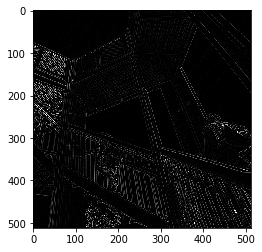

In [170]:
# Convolued img with sharp edges and straight lines
conv_img(filter1)

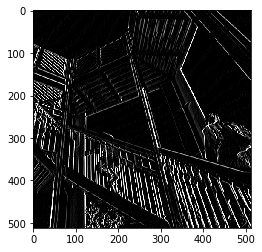

In [171]:
# Convolued img with vertical lines
conv_img(filter2)

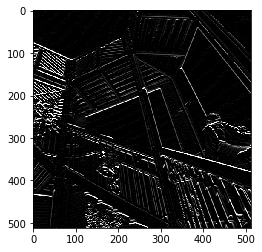

In [172]:
# Convolued img with vertical lines
conv_img(filter3)

## Pooling 

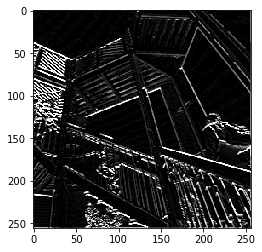

In [177]:
new_x = int(size_x/2)
new_y = int(size_y/2)
new_img = np.zeros((new_x, new_y))

for x in range(0, size_x, 2):
    for y in range(0, size_y, 2):
        pixels = []
        pixels.append(ascent_transformed[x,y])
        pixels.append(ascent_transformed[x+1,y])
        pixels.append(ascent_transformed[x,y+1])
        pixels.append(ascent_transformed[x+1,y+1])
        new_img[int(x/2),int(y/2)] = max(pixels)

# plot image
plt.gray()
plt.grid(False)
plt.imshow(new_img)
plt.show()       